In [1]:
%matplotlib inline

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits, load_iris

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier

from sklearn.inspection import permutation_importance

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

# Tree and Ensemble Methods

In [3]:
data = load_iris()

In [4]:
attributes, target = data['data'], data['target']

In [5]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
tree = DecisionTreeClassifier()

In [7]:
tree.fit(attributes, target)

DecisionTreeClassifier()

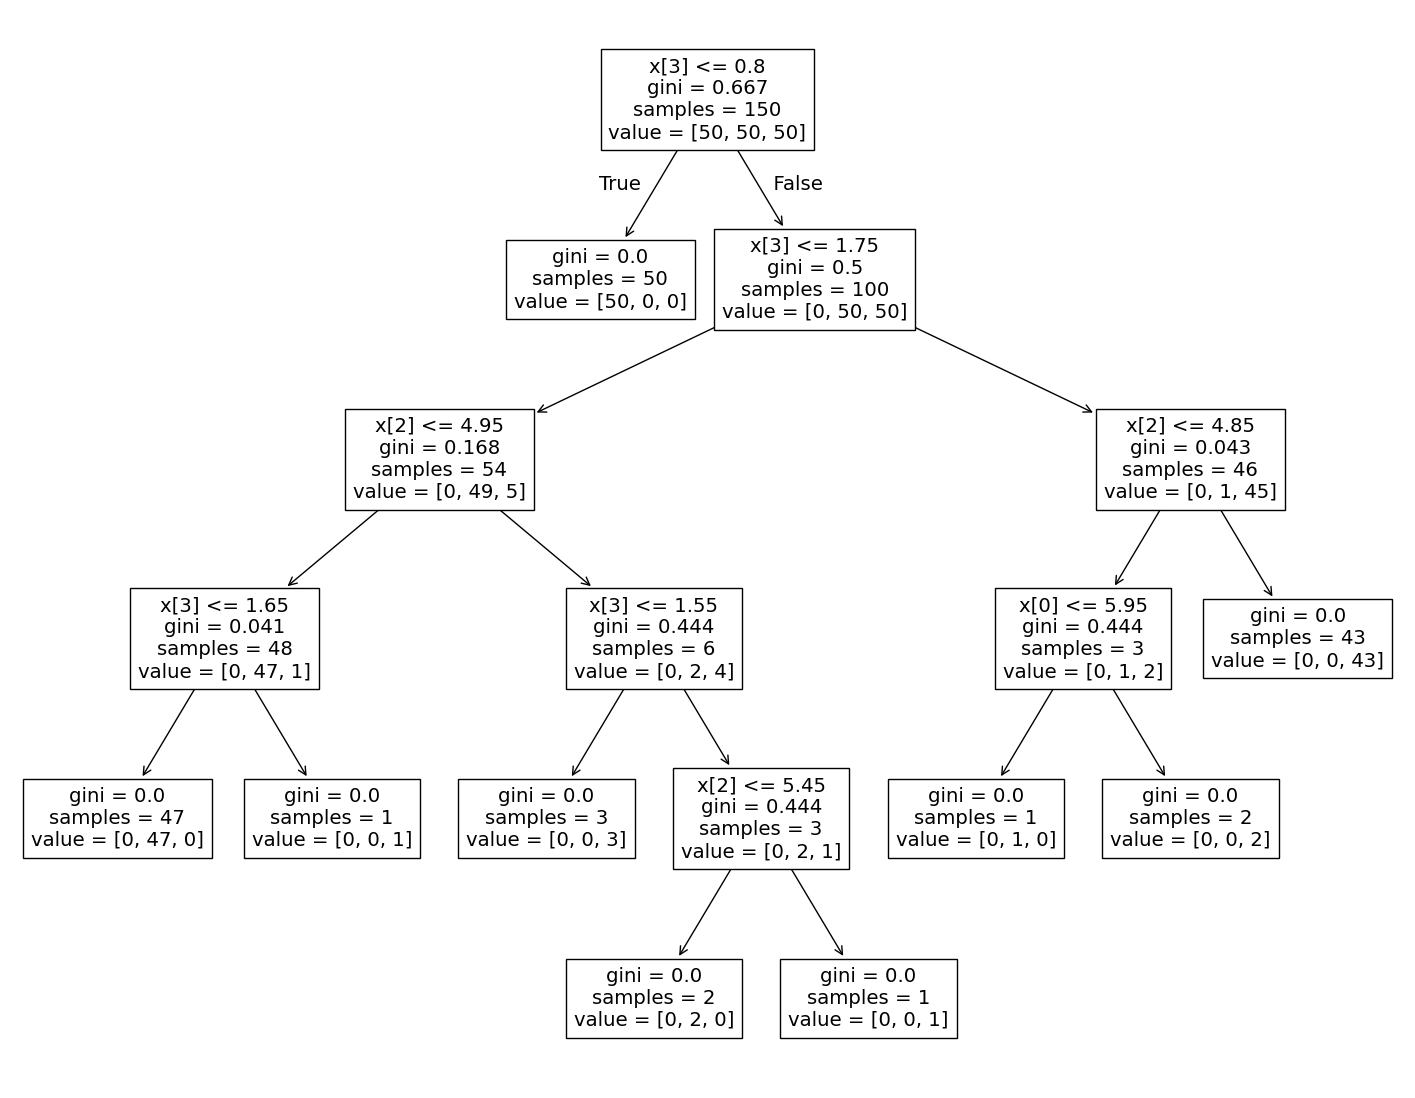

In [8]:
plt.figure(figsize = (18, 14))
plot_tree(tree)
plt.show()

# Information gain

![information gain formula](information_gain.png)

![measures](measures.png)

![impurity measures visualization](impurity_measures.png)

<b>Settings</b>

In [9]:
digits = load_digits()

In [10]:
attributes, target = digits['data'], digits['target']

In [11]:
attributes.shape

(1797, 64)

In [12]:
tree = DecisionTreeClassifier()

In [13]:
tree.fit(attributes, target)

DecisionTreeClassifier()

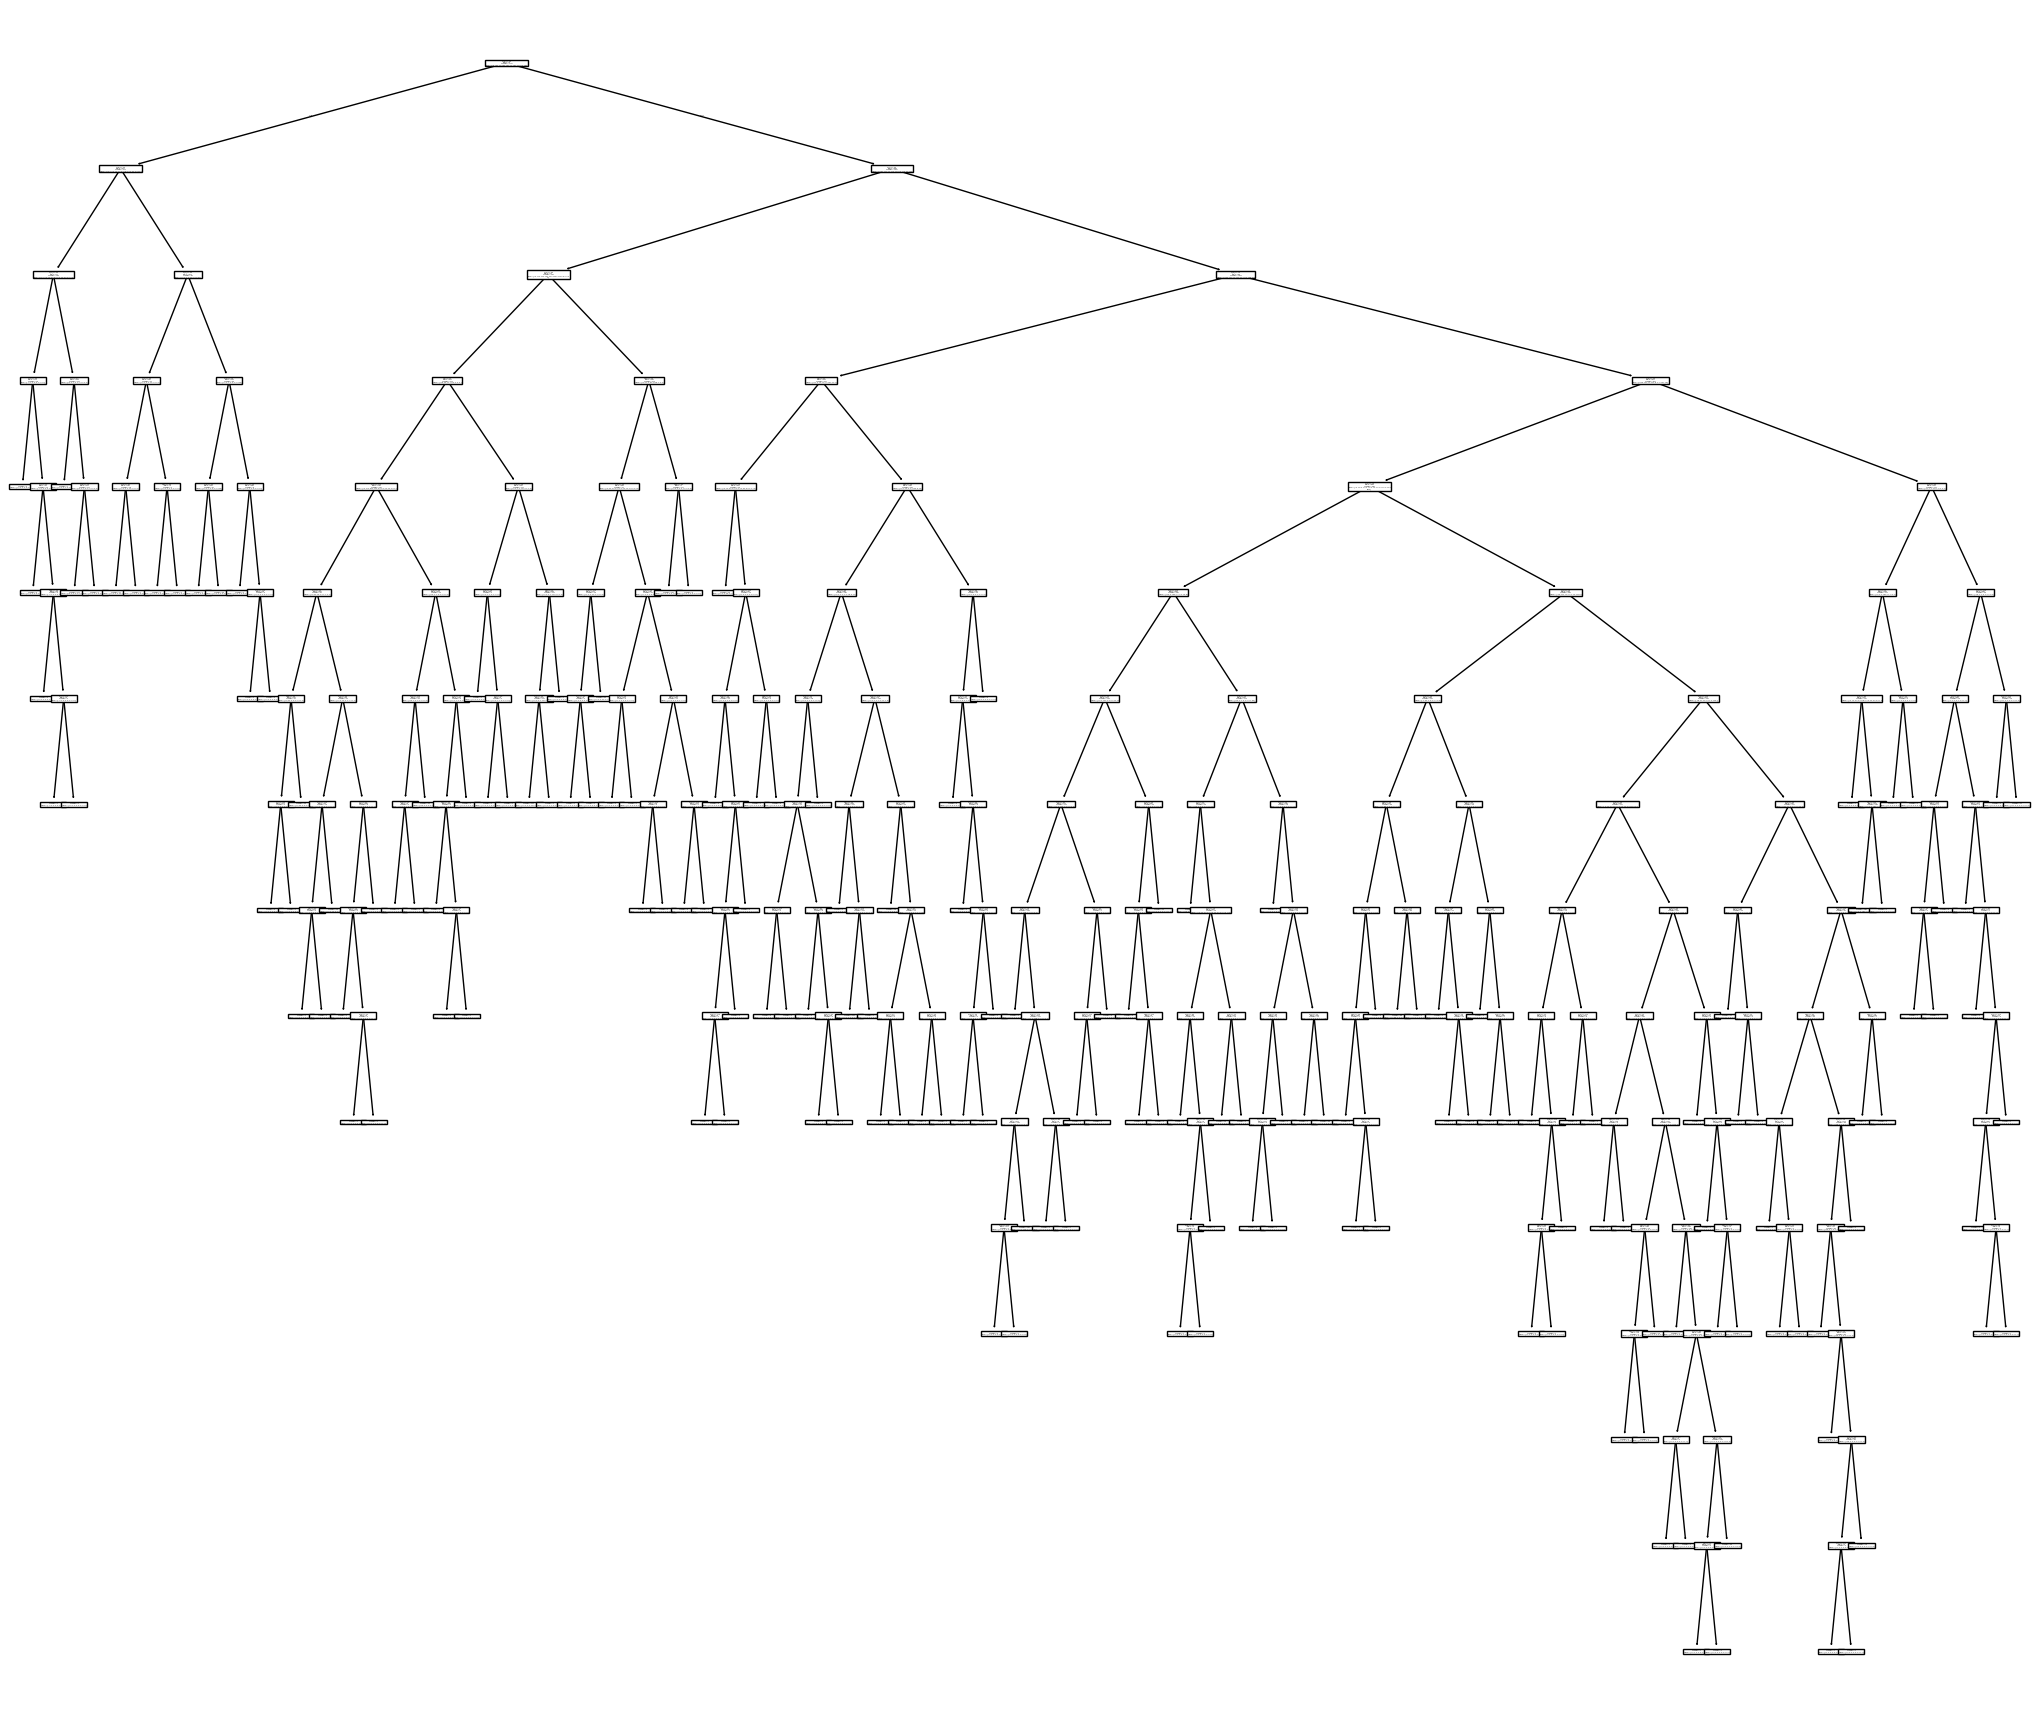

In [14]:
plt.figure(figsize = (26, 22))
plot_tree(tree)
plt.show()

In [15]:
print(export_text(tree))

|--- feature_36 <= 0.50
|   |--- feature_28 <= 2.50
|   |   |--- feature_21 <= 0.50
|   |   |   |--- feature_61 <= 0.50
|   |   |   |   |--- class: 5
|   |   |   |--- feature_61 >  0.50
|   |   |   |   |--- feature_3 <= 4.50
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_3 >  4.50
|   |   |   |   |   |--- feature_58 <= 3.50
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- feature_58 >  3.50
|   |   |   |   |   |   |--- feature_3 <= 14.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  14.00
|   |   |   |   |   |   |   |--- class: 2
|   |   |--- feature_21 >  0.50
|   |   |   |--- feature_3 <= 3.00
|   |   |   |   |--- class: 4
|   |   |   |--- feature_3 >  3.00
|   |   |   |   |--- feature_63 <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_63 >  1.50
|   |   |   |   |   |--- class: 2
|   |--- feature_28 >  2.50
|   |   |--- feature_21 <= 6.50
|   |   |   |--- feature_43 <= 0.50
|   |   |   |   |---

In [16]:
tree.tree_.max_depth # check the depth of the tree

15

<b> max_depth</b>

In [17]:
tree = DecisionTreeClassifier(max_depth = 4) # we add bias hier, we reduce the variance (we did bias-variance trade-off)

In [18]:
tree.fit(attributes, target)

DecisionTreeClassifier(max_depth=4)

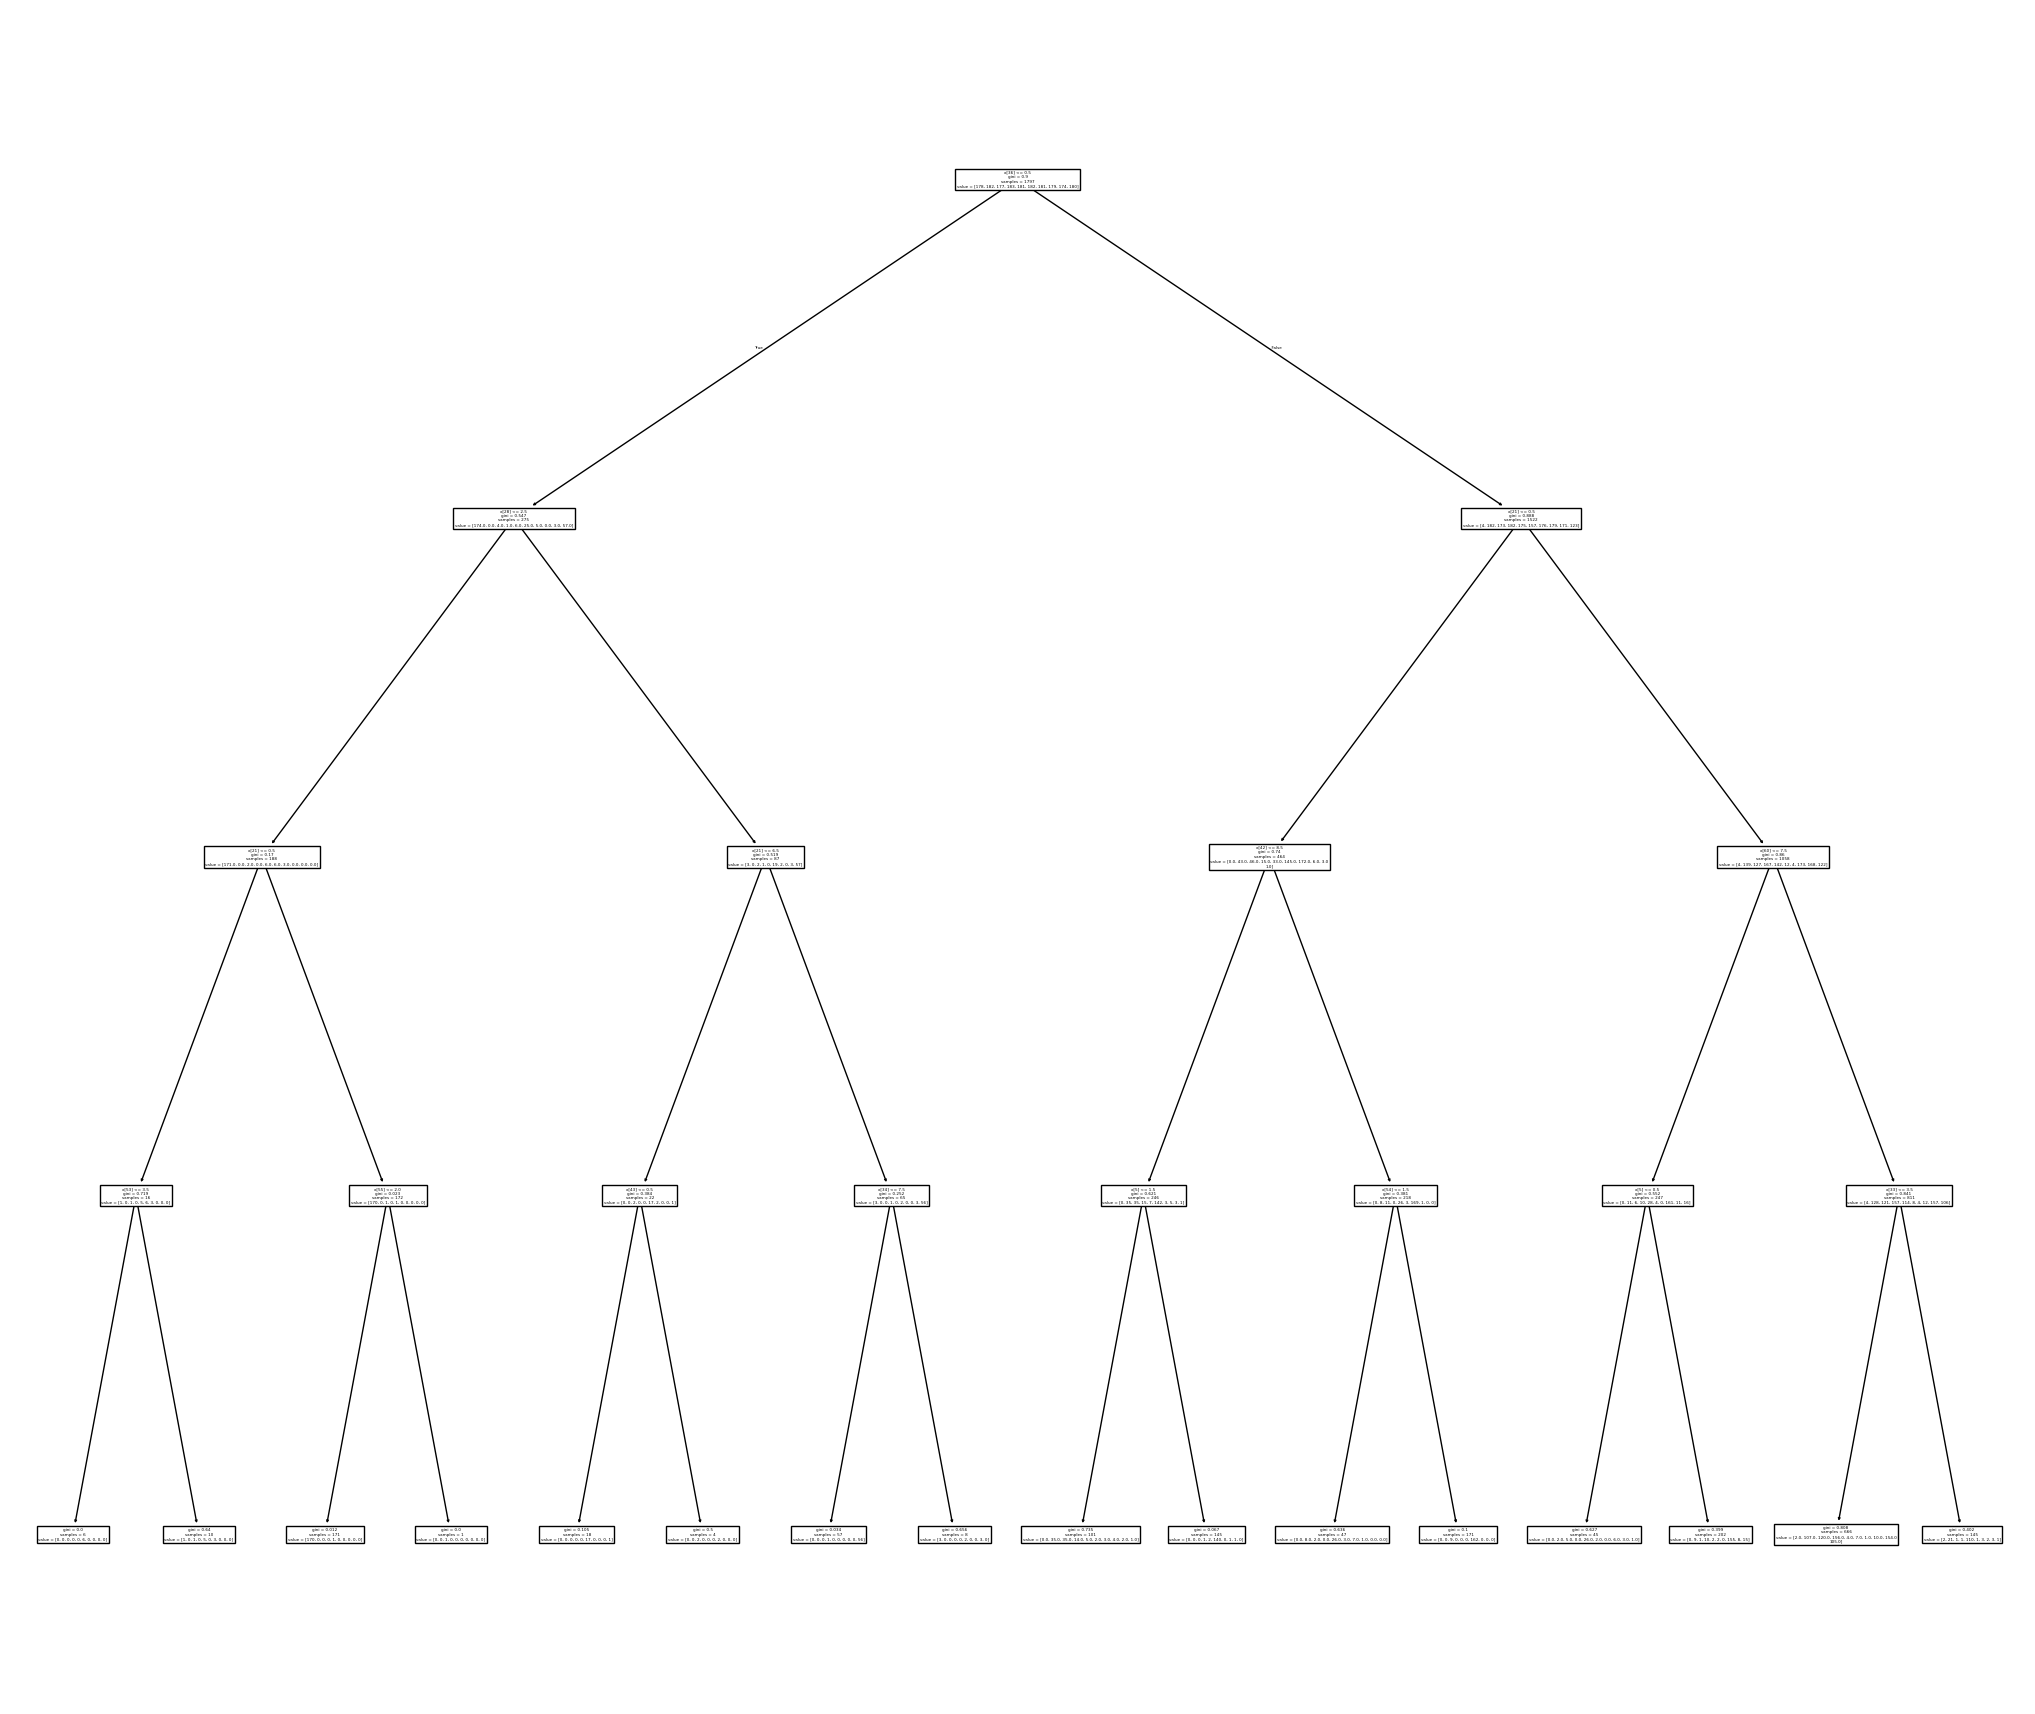

In [19]:
plt.figure(figsize = (26, 22))
plot_tree(tree)
plt.show()

In [20]:
print(export_text(tree))

|--- feature_36 <= 0.50
|   |--- feature_28 <= 2.50
|   |   |--- feature_21 <= 0.50
|   |   |   |--- feature_53 <= 3.50
|   |   |   |   |--- class: 5
|   |   |   |--- feature_53 >  3.50
|   |   |   |   |--- class: 4
|   |   |--- feature_21 >  0.50
|   |   |   |--- feature_55 <= 2.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_55 >  2.00
|   |   |   |   |--- class: 2
|   |--- feature_28 >  2.50
|   |   |--- feature_21 <= 6.50
|   |   |   |--- feature_43 <= 0.50
|   |   |   |   |--- class: 5
|   |   |   |--- feature_43 >  0.50
|   |   |   |   |--- class: 2
|   |   |--- feature_21 >  6.50
|   |   |   |--- feature_34 <= 7.50
|   |   |   |   |--- class: 9
|   |   |   |--- feature_34 >  7.50
|   |   |   |   |--- class: 0
|--- feature_36 >  0.50
|   |--- feature_21 <= 0.50
|   |   |--- feature_42 <= 8.50
|   |   |   |--- feature_5 <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  1.50
|   |   |   |   |--- class: 5
|   |   |--- feature_42 >  8.50
|   |   |   |--- f

In [21]:
tree.tree_.max_depth

4

<b>min_samples_split, min_samples_leaf</b>

In [22]:
tree = DecisionTreeClassifier(min_samples_split = 20, min_samples_leaf = 5)

In [23]:
tree.fit(attributes, target)

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=20)

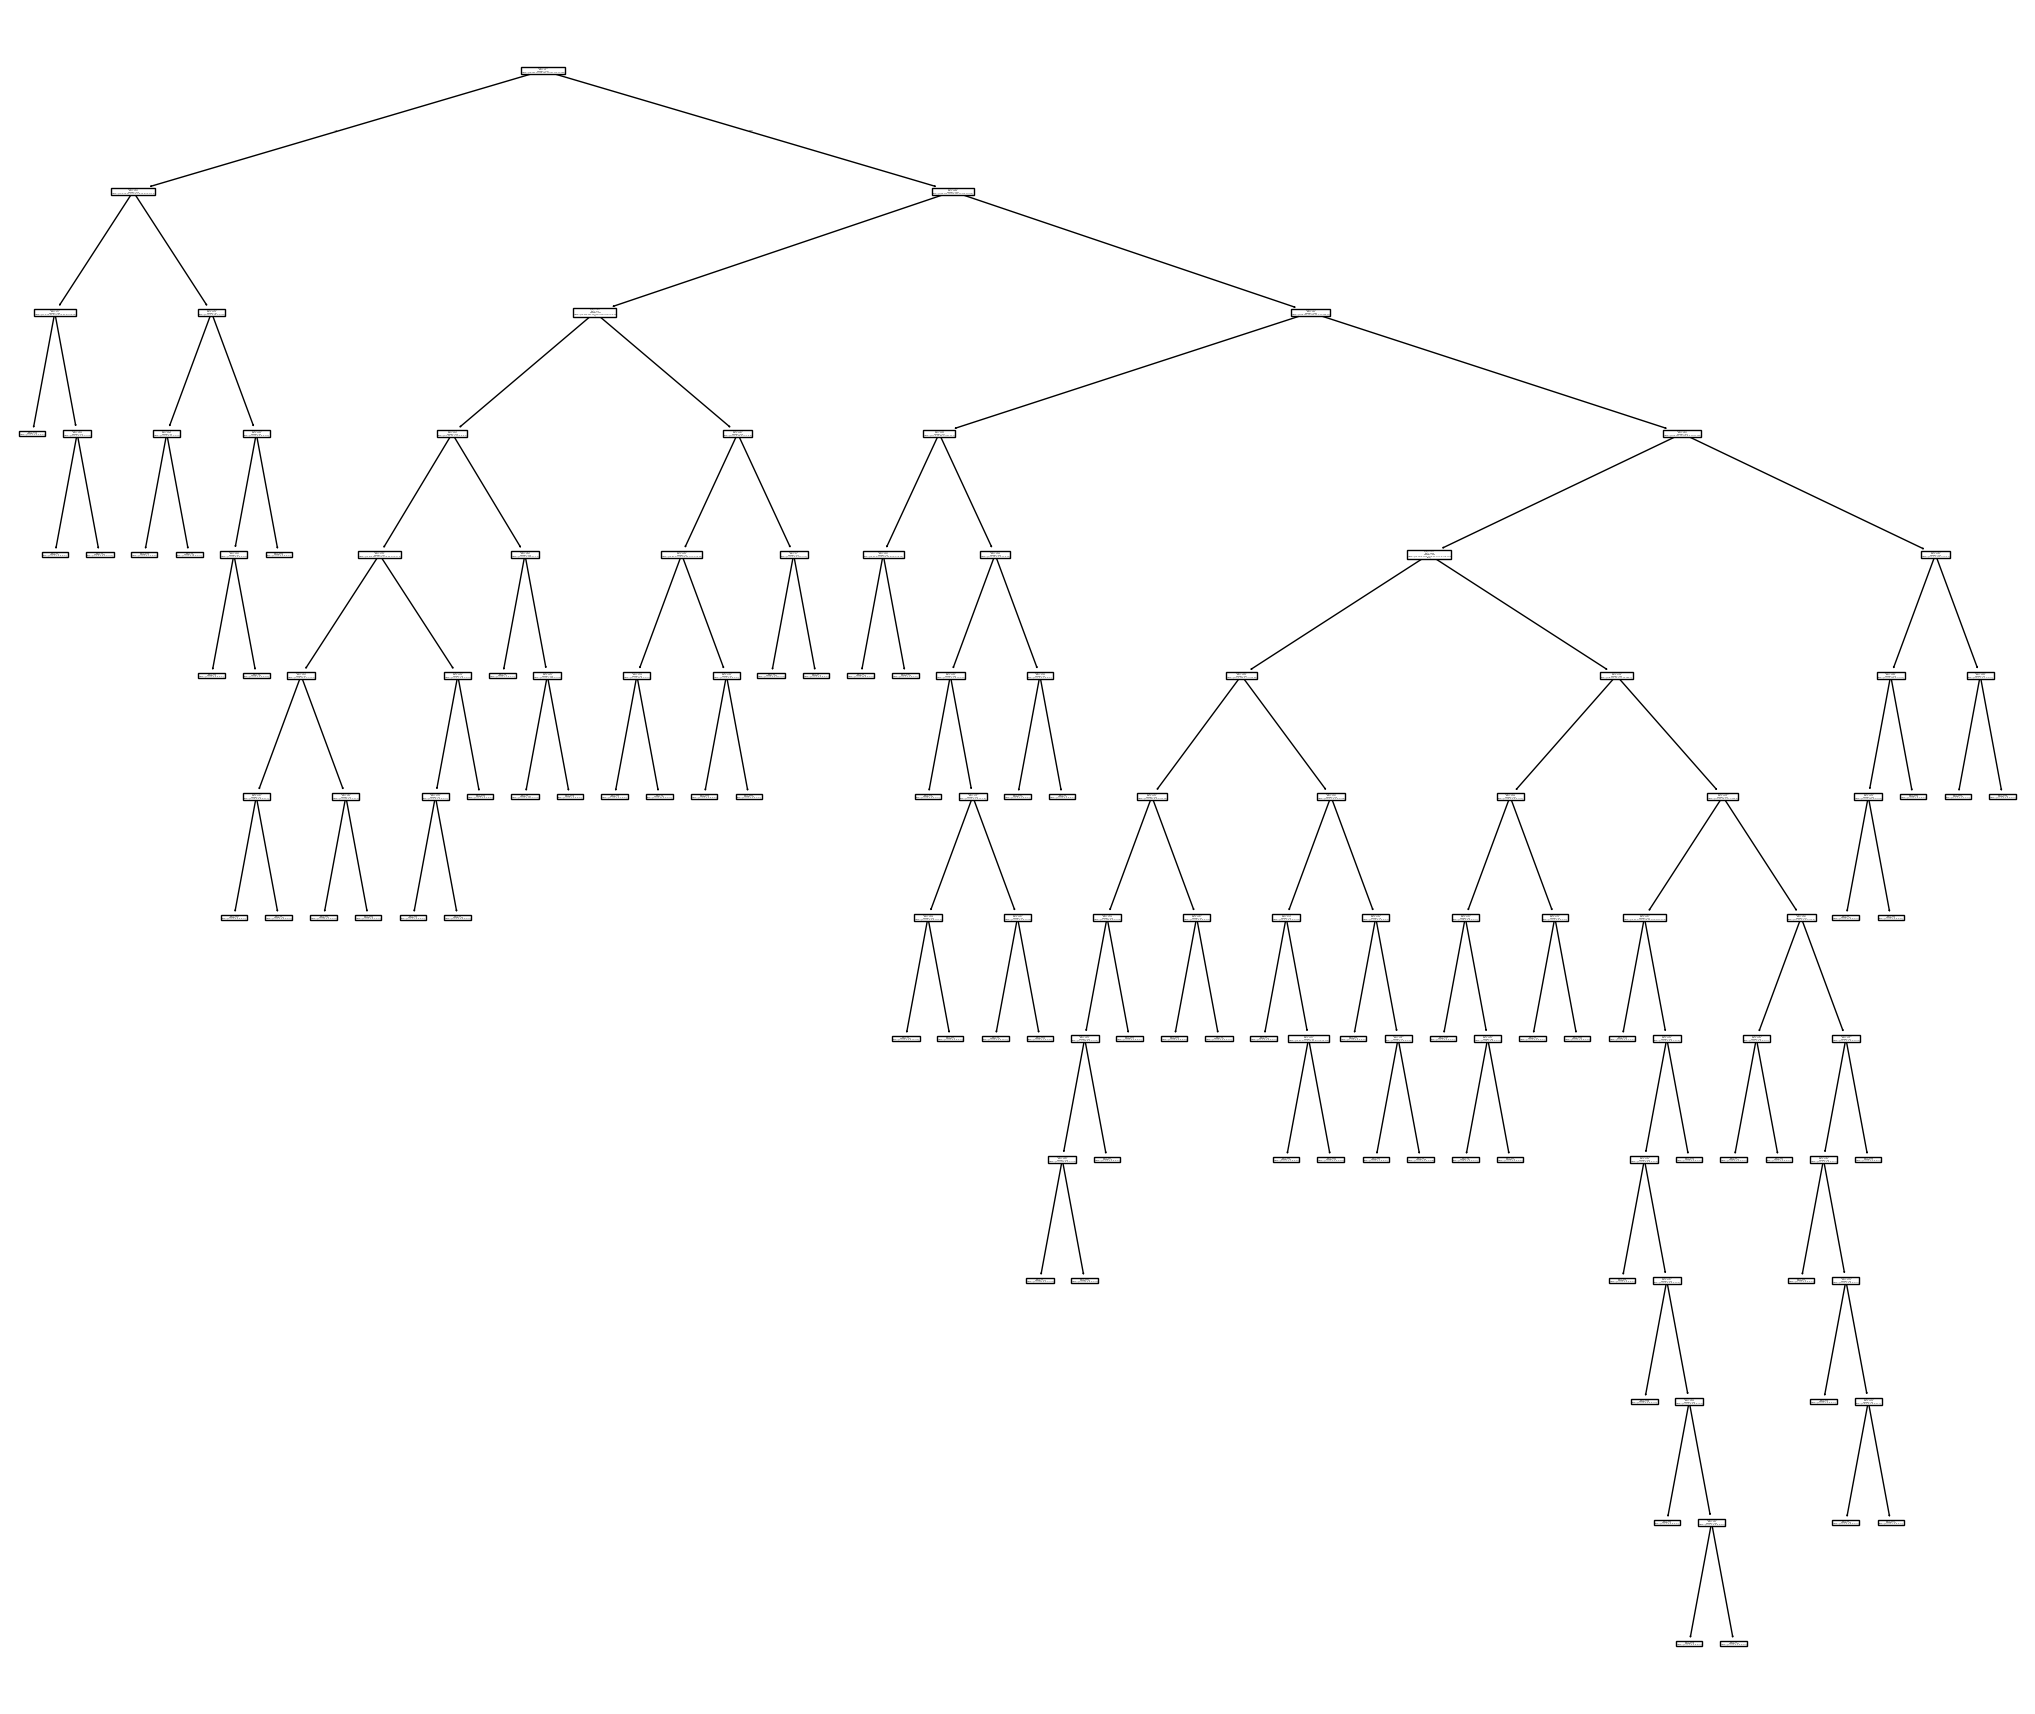

In [24]:
plt.figure(figsize = (26, 22))
plot_tree(tree)
plt.show()

In [25]:
print(export_text(tree))

|--- feature_36 <= 0.50
|   |--- feature_28 <= 2.50
|   |   |--- feature_21 <= 0.50
|   |   |   |--- class: 5
|   |   |--- feature_21 >  0.50
|   |   |   |--- feature_18 <= 6.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_18 >  6.50
|   |   |   |   |--- class: 0
|   |--- feature_28 >  2.50
|   |   |--- feature_21 <= 6.50
|   |   |   |--- feature_5 <= 1.00
|   |   |   |   |--- class: 2
|   |   |   |--- feature_5 >  1.00
|   |   |   |   |--- class: 5
|   |   |--- feature_21 >  6.50
|   |   |   |--- feature_34 <= 7.50
|   |   |   |   |--- feature_27 <= 7.50
|   |   |   |   |   |--- class: 9
|   |   |   |   |--- feature_27 >  7.50
|   |   |   |   |   |--- class: 9
|   |   |   |--- feature_34 >  7.50
|   |   |   |   |--- class: 0
|--- feature_36 >  0.50
|   |--- feature_21 <= 0.50
|   |   |--- feature_42 <= 8.50
|   |   |   |--- feature_5 <= 1.50
|   |   |   |   |--- feature_19 <= 13.50
|   |   |   |   |   |--- feature_37 <= 4.00
|   |   |   |   |   |   |--- feature_58 <= 1.50
| 

In [26]:
tree.tree_.max_depth

13

<b>min_samples_leaf = 0.1</b>

In [27]:
tree = DecisionTreeClassifier(min_samples_leaf = 0.1) 

In [28]:
tree.fit(attributes, target)

DecisionTreeClassifier(min_samples_leaf=0.1)

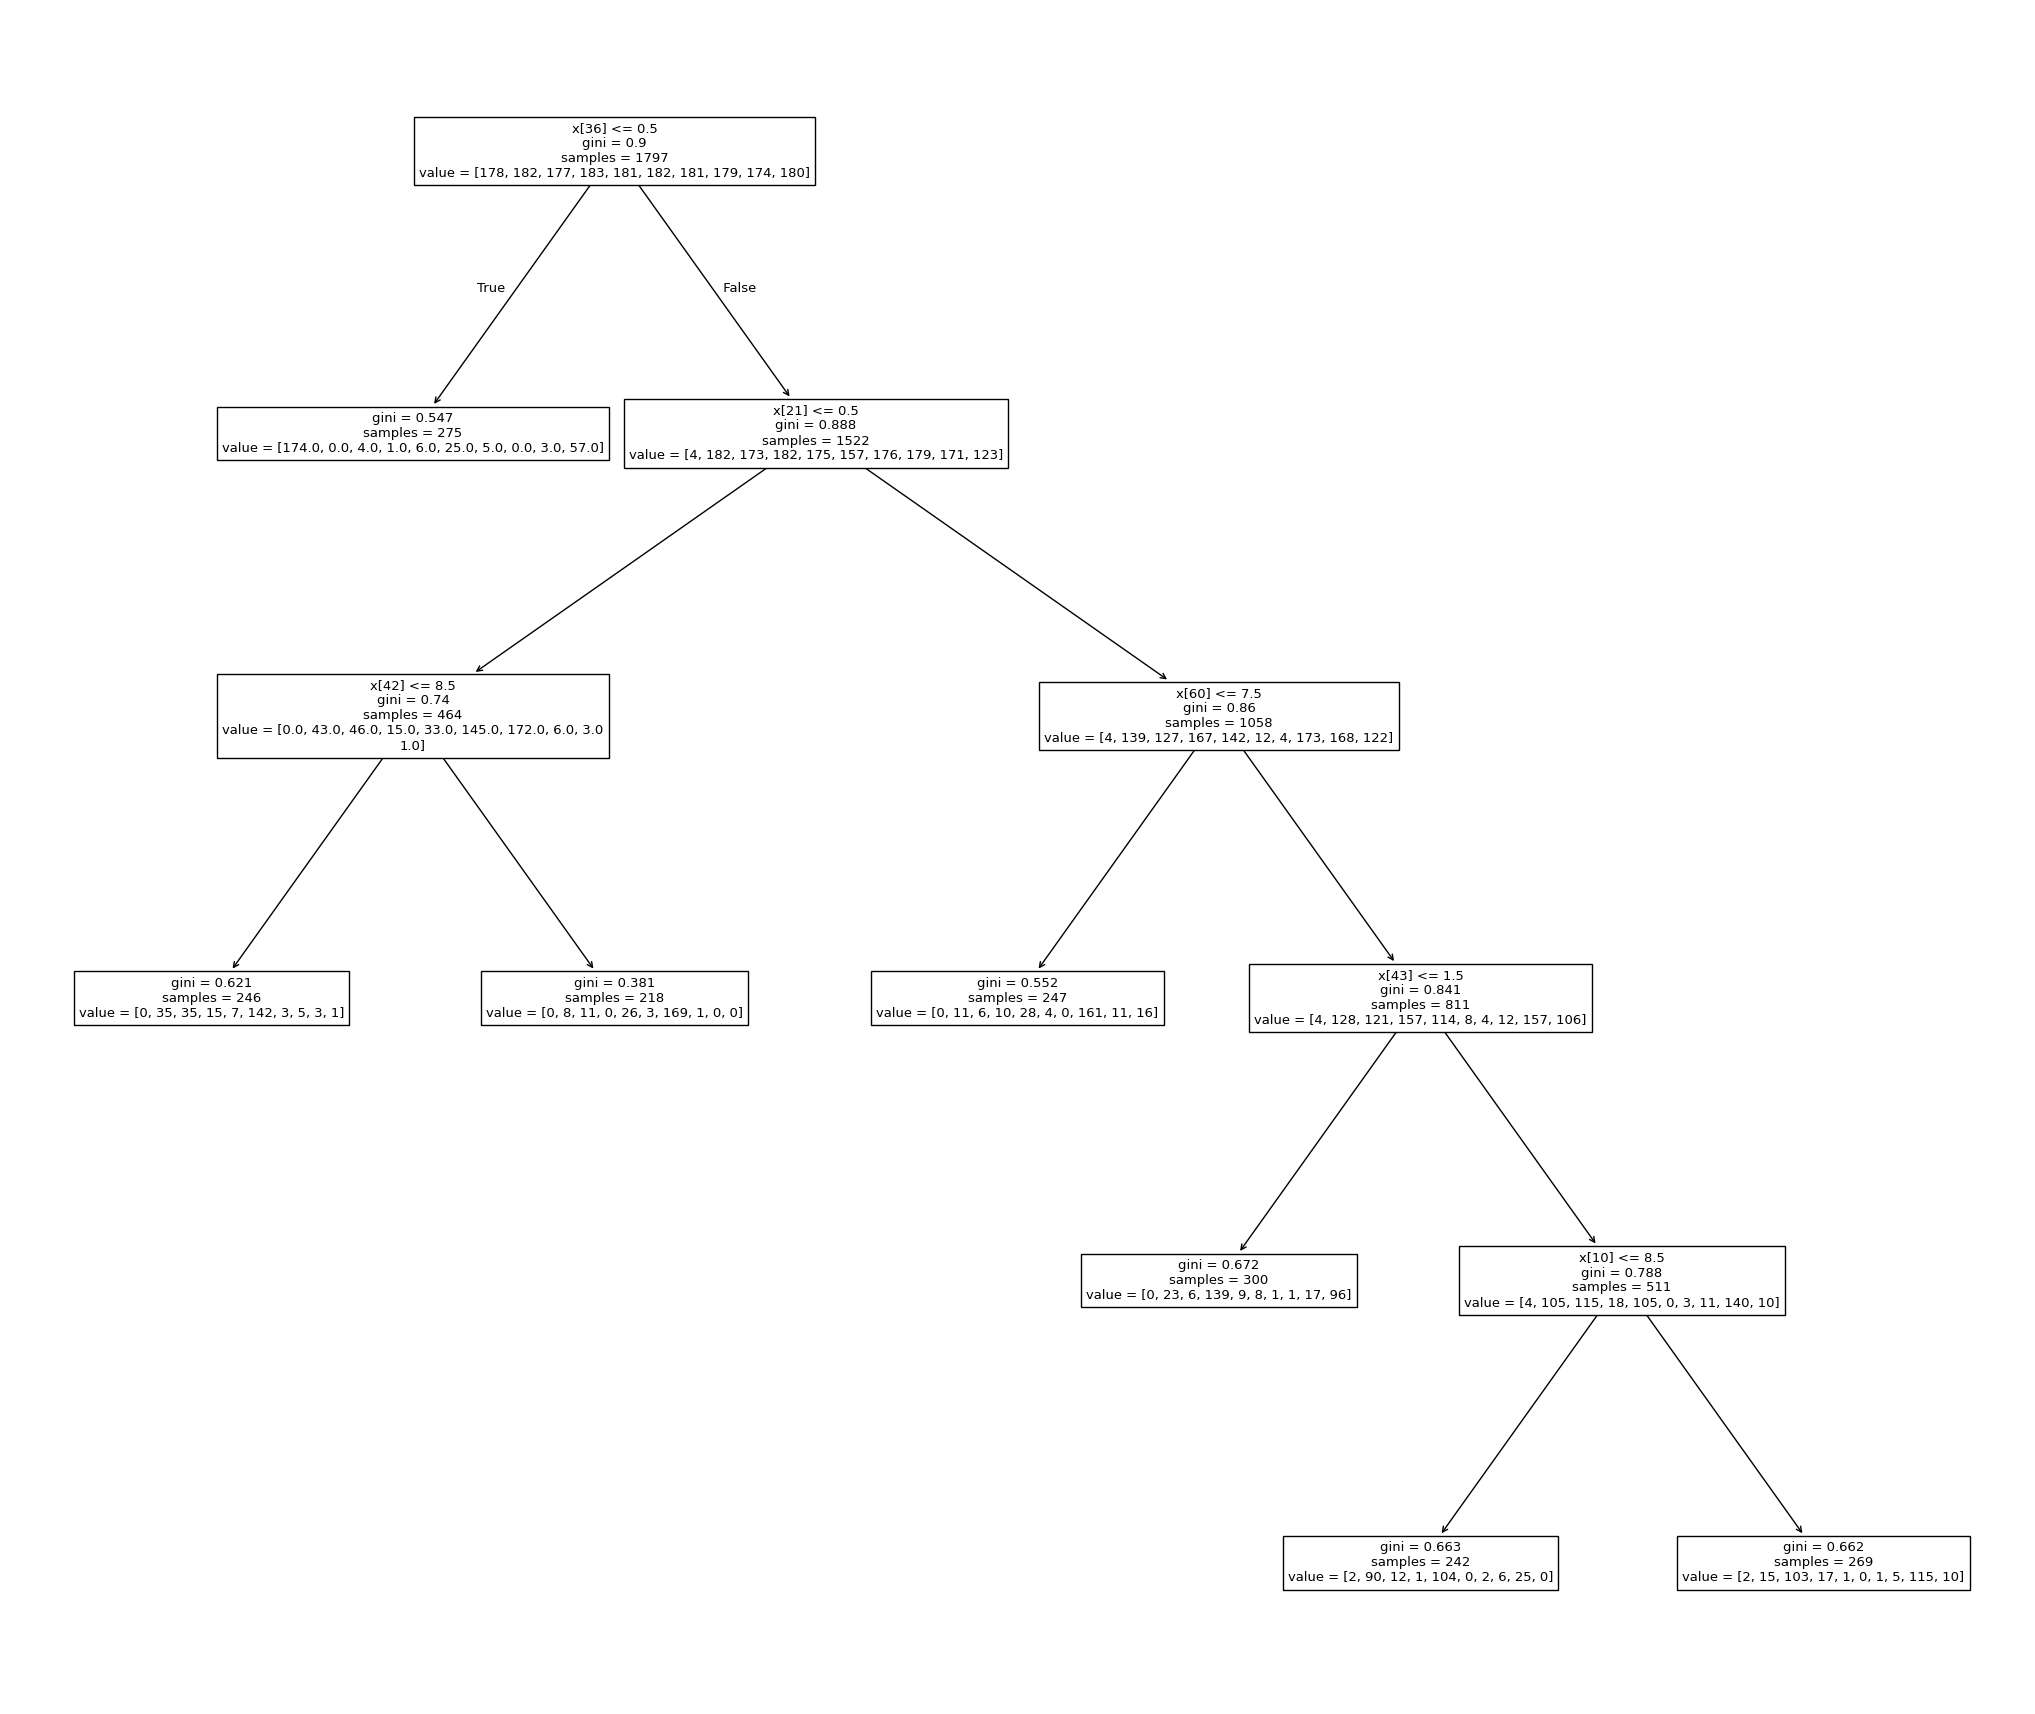

In [29]:
plt.figure(figsize = (26, 22))
plot_tree(tree)
plt.show()

In [30]:
print(export_text(tree))

|--- feature_36 <= 0.50
|   |--- class: 0
|--- feature_36 >  0.50
|   |--- feature_21 <= 0.50
|   |   |--- feature_42 <= 8.50
|   |   |   |--- class: 5
|   |   |--- feature_42 >  8.50
|   |   |   |--- class: 6
|   |--- feature_21 >  0.50
|   |   |--- feature_60 <= 7.50
|   |   |   |--- class: 7
|   |   |--- feature_60 >  7.50
|   |   |   |--- feature_43 <= 1.50
|   |   |   |   |--- class: 3
|   |   |   |--- feature_43 >  1.50
|   |   |   |   |--- feature_10 <= 8.50
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_10 >  8.50
|   |   |   |   |   |--- class: 8



In [31]:
tree.tree_.max_depth

5

<b>min_samples_leaf = 0.05</b>

In [32]:
tree = DecisionTreeClassifier(min_samples_leaf = 0.05) 

In [33]:
tree.fit(attributes, target)

DecisionTreeClassifier(min_samples_leaf=0.05)

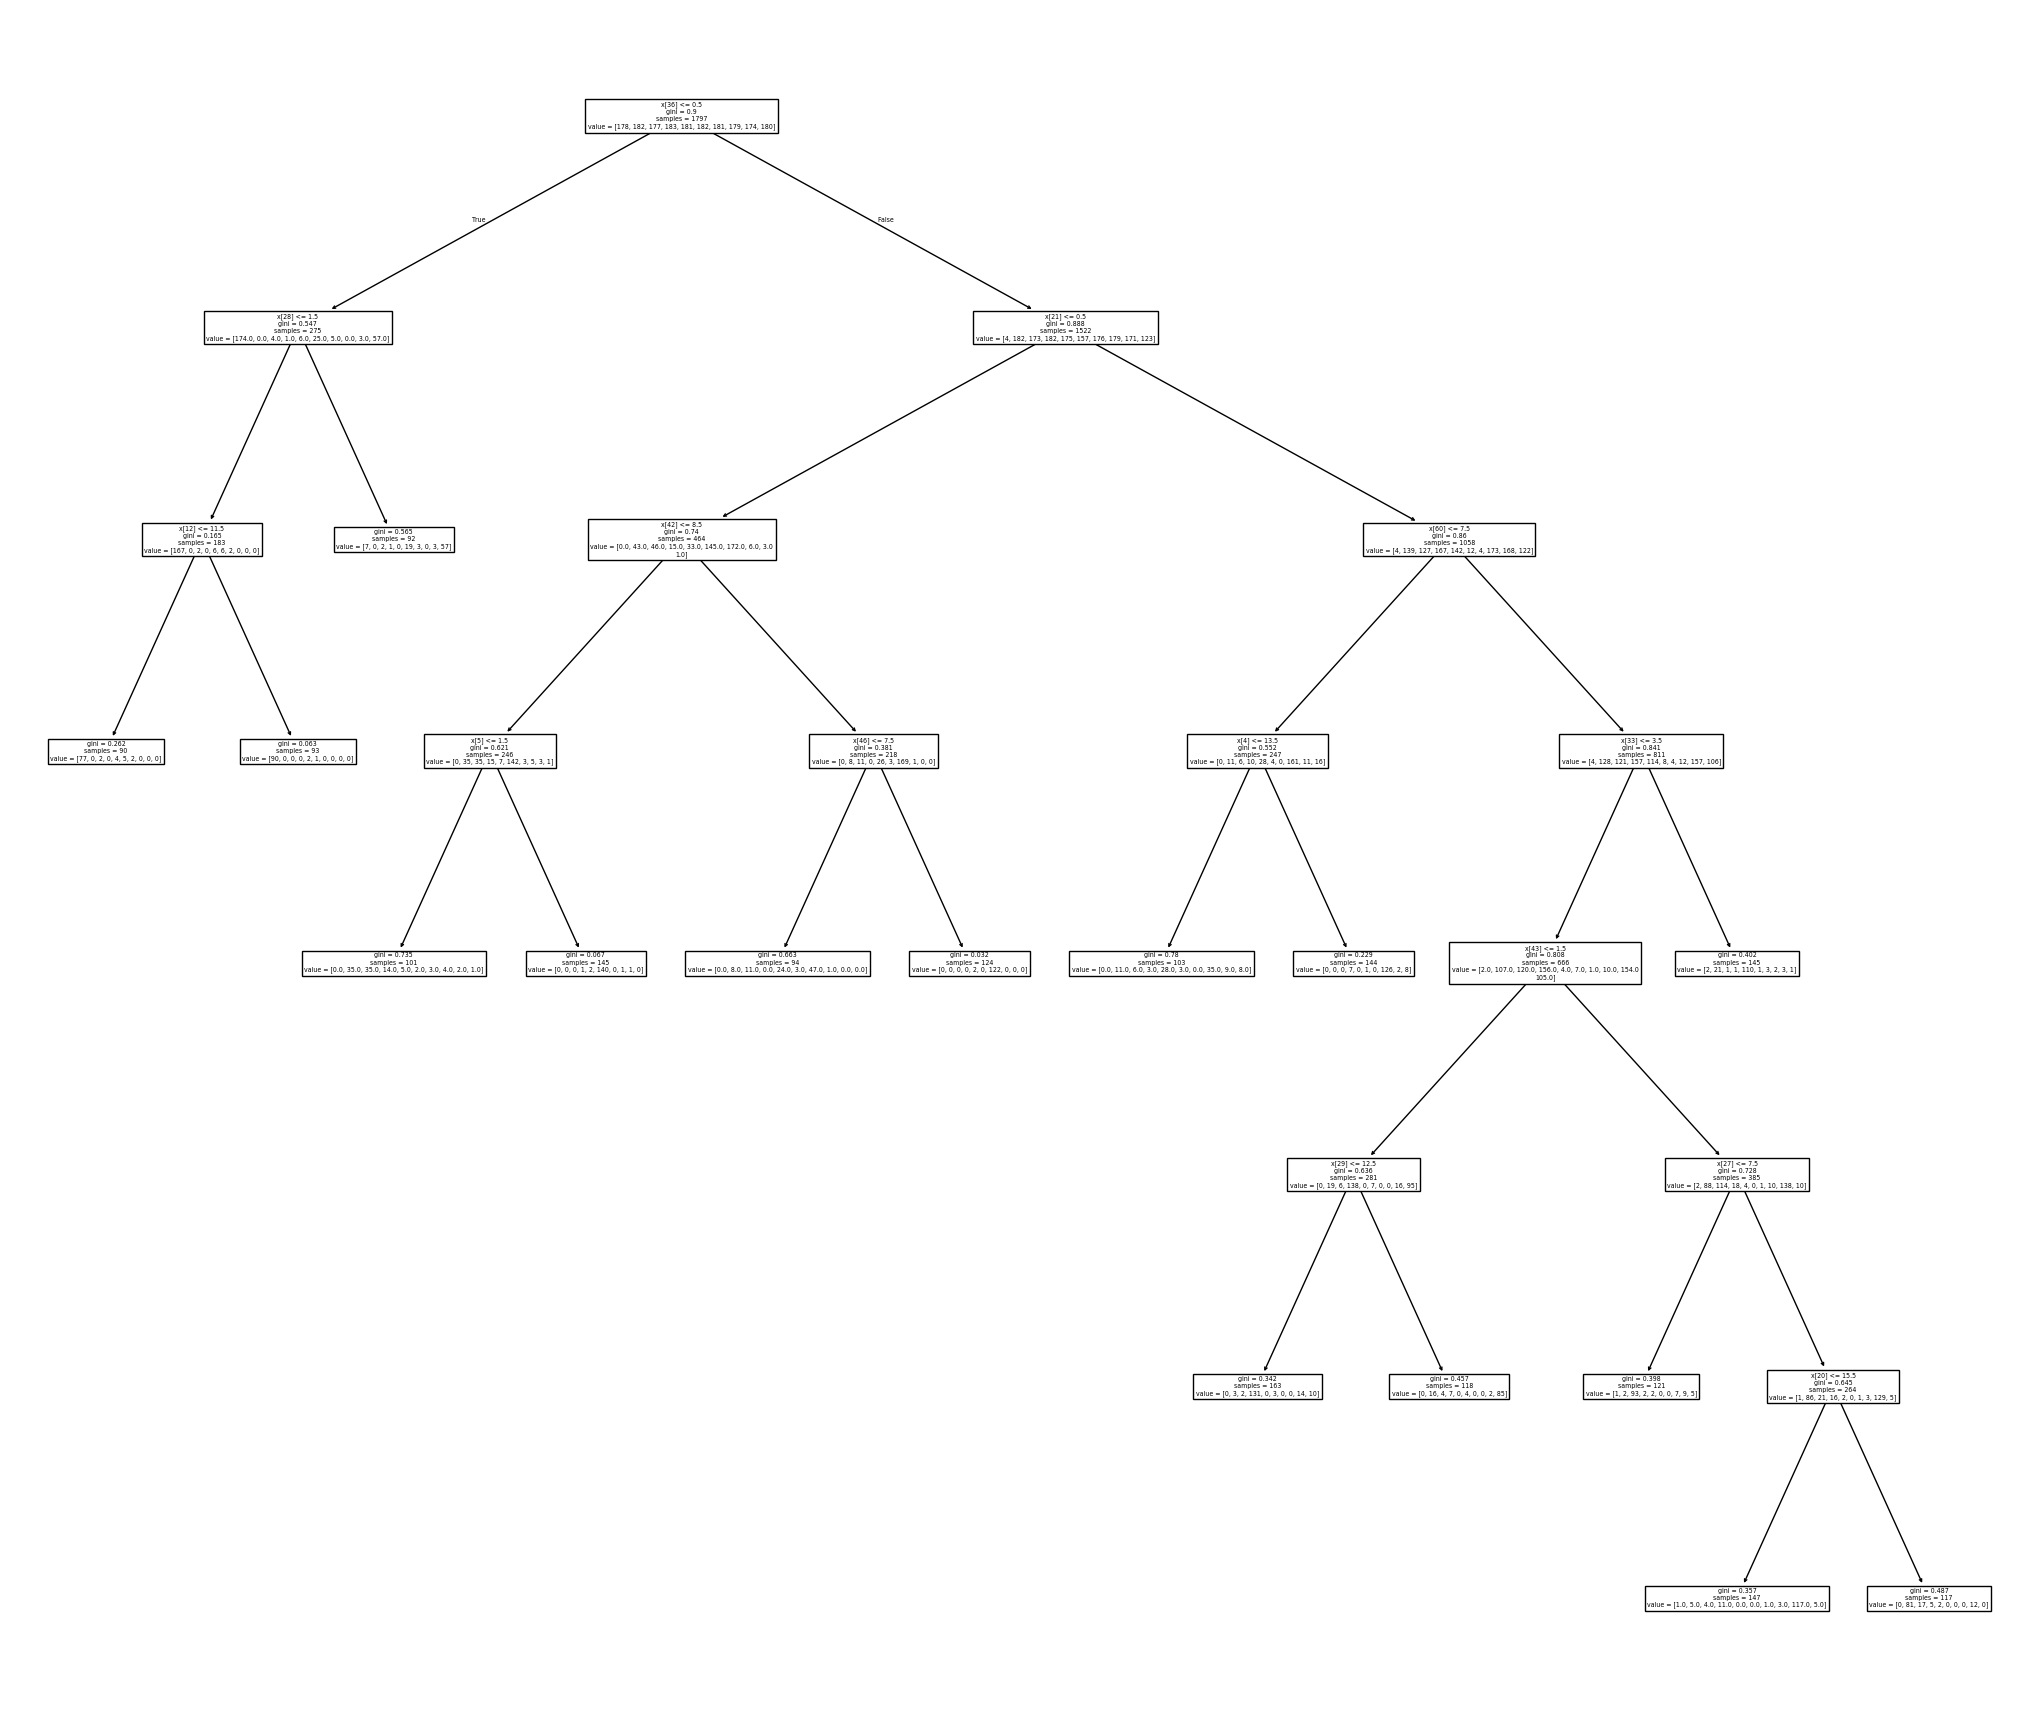

In [34]:
plt.figure(figsize = (26, 22))
plot_tree(tree)
plt.show()

In [35]:
print(export_text(tree))

|--- feature_36 <= 0.50
|   |--- feature_28 <= 1.50
|   |   |--- feature_12 <= 11.50
|   |   |   |--- class: 0
|   |   |--- feature_12 >  11.50
|   |   |   |--- class: 0
|   |--- feature_28 >  1.50
|   |   |--- class: 9
|--- feature_36 >  0.50
|   |--- feature_21 <= 0.50
|   |   |--- feature_42 <= 8.50
|   |   |   |--- feature_5 <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  1.50
|   |   |   |   |--- class: 5
|   |   |--- feature_42 >  8.50
|   |   |   |--- feature_46 <= 7.50
|   |   |   |   |--- class: 6
|   |   |   |--- feature_46 >  7.50
|   |   |   |   |--- class: 6
|   |--- feature_21 >  0.50
|   |   |--- feature_60 <= 7.50
|   |   |   |--- feature_4 <= 13.50
|   |   |   |   |--- class: 7
|   |   |   |--- feature_4 >  13.50
|   |   |   |   |--- class: 7
|   |   |--- feature_60 >  7.50
|   |   |   |--- feature_33 <= 3.50
|   |   |   |   |--- feature_43 <= 1.50
|   |   |   |   |   |--- feature_29 <= 12.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |  

In [36]:
tree.tree_.max_depth

7

All these parameters should not be set at once.

# iris_dataset

In [37]:
iris = load_iris()

In [38]:
# Plot the test data and predicted values in different colors (classes)

X = iris.data[:, :2] # Sepal length, sepal width
y = iris.target
h = 0.02 # Step size

color_dict = {0: "blue", 1: "lightgreen", 2: "red"}
colors = [color_dict[i] for i in y]

depth_2 = DecisionTreeClassifier(max_depth = 2).fit(X, y)
depth_4 = DecisionTreeClassifier(max_depth = 4).fit(X, y)
titles = ["Max depth = 2", "Max depth = 4"]

In [39]:
# create a mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

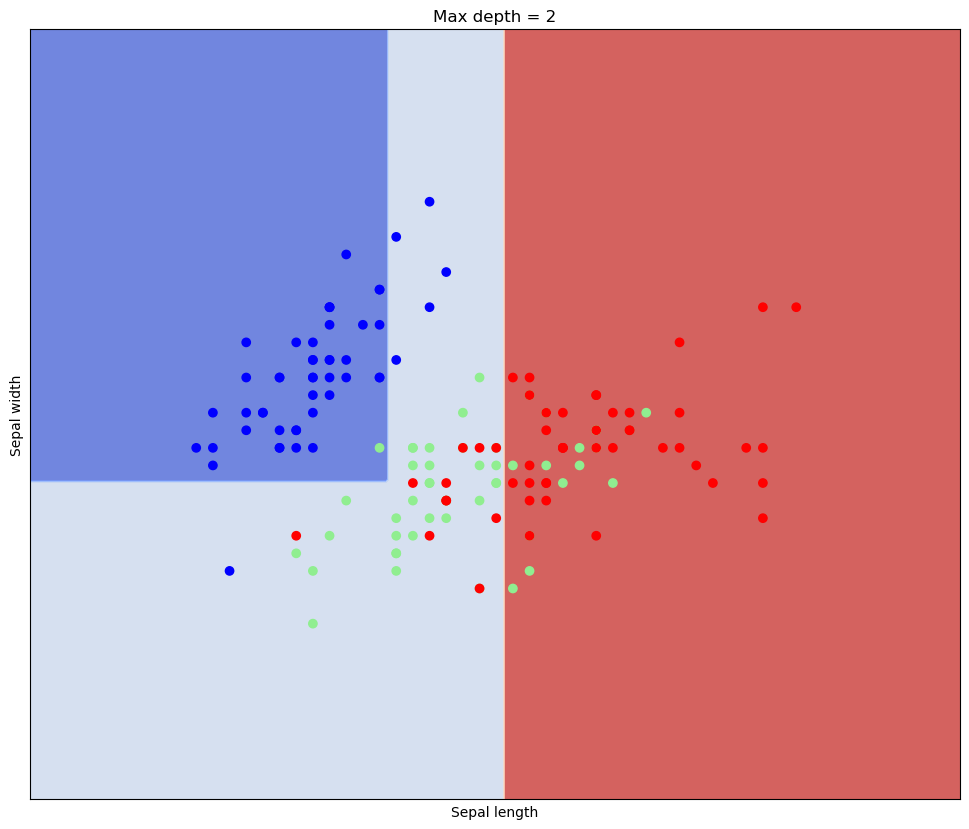

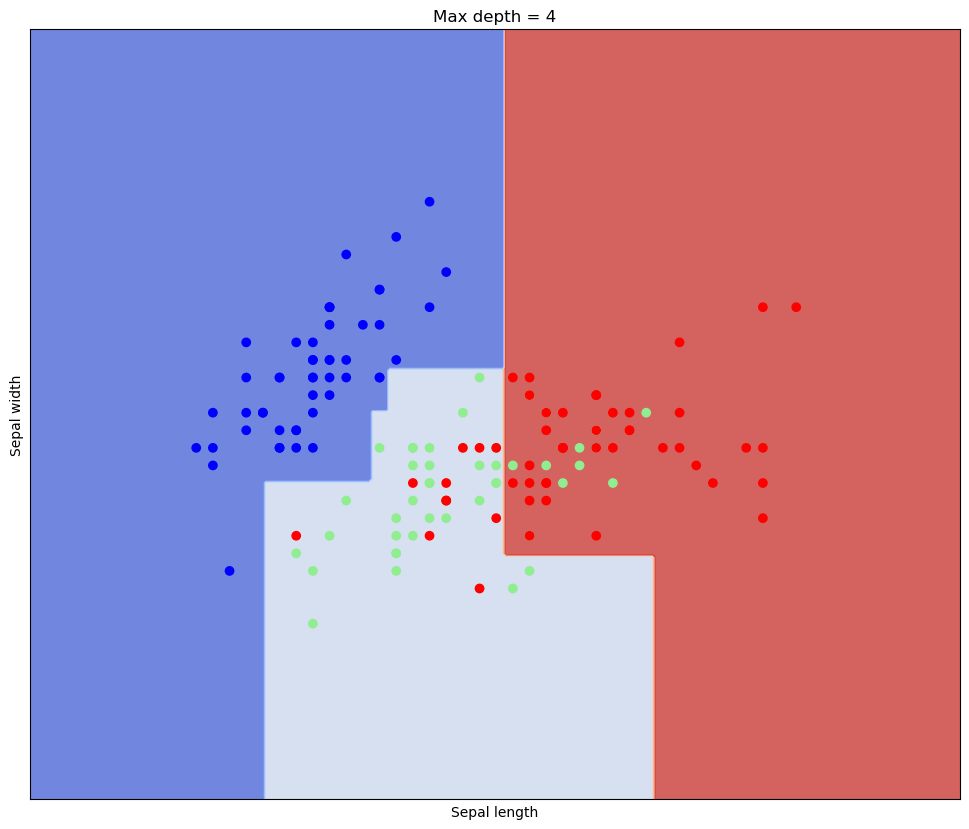

In [40]:
# Create and evaluate predictions for all classifiers
for i, classifier in enumerate((depth_2, depth_4)):
    plt.figure(figsize = (12, 10))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
    plt.scatter(X[:, 0], X[:, 1], c = colors)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

<p style="font-size: 42px;"><b>Decision Forests</b></p>

Combinations / Ensembels of decision trees.

The forest is a massive of trees.

In [41]:
digits = load_digits()

In [42]:
attributes, target = digits['data'], digits['target']

In [43]:
trees = [
    DecisionTreeClassifier(),
    DecisionTreeClassifier(),
    DecisionTreeClassifier(),
    DecisionTreeClassifier(),
    DecisionTreeClassifier(),
]

In [44]:
for tree in trees:
    tree.fit(attributes, target)

In [45]:
trees[0]

DecisionTreeClassifier()

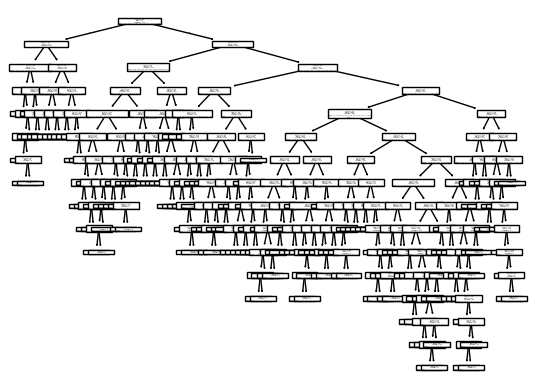

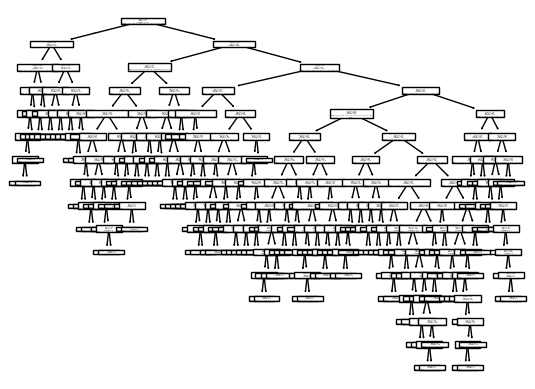

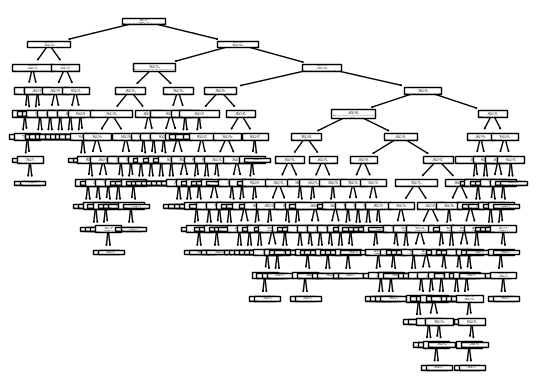

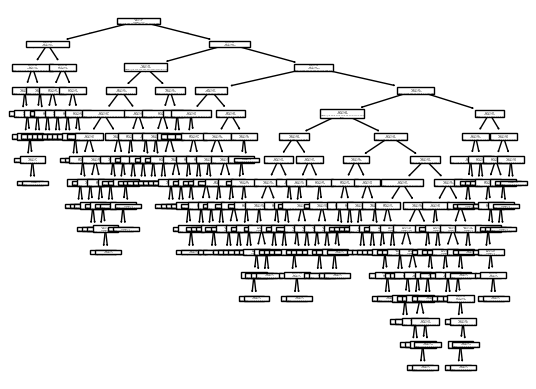

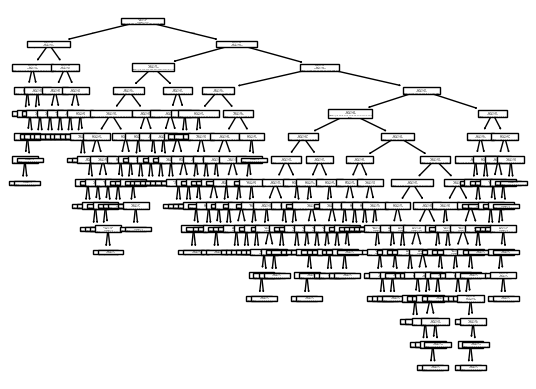

In [46]:
for tree in trees:
    plot_tree(tree)
    plt.show()

<b>Different parameters of the trees</b>

In [47]:
trees = [
    DecisionTreeClassifier(max_depth = 8),
    DecisionTreeClassifier(max_depth = 4),
    DecisionTreeClassifier(max_depth = 20),
    DecisionTreeClassifier(max_depth = 10),
    DecisionTreeClassifier(max_depth = 2),
]

In [48]:
for tree in trees:
    tree.fit(attributes, target)

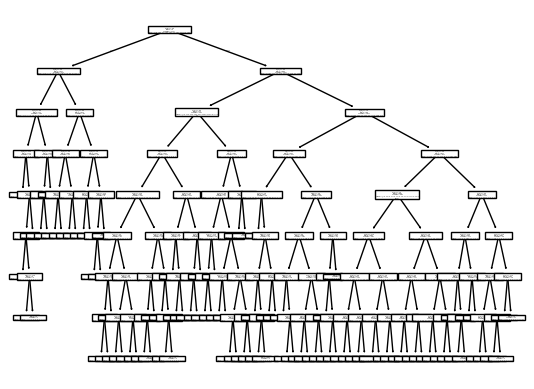

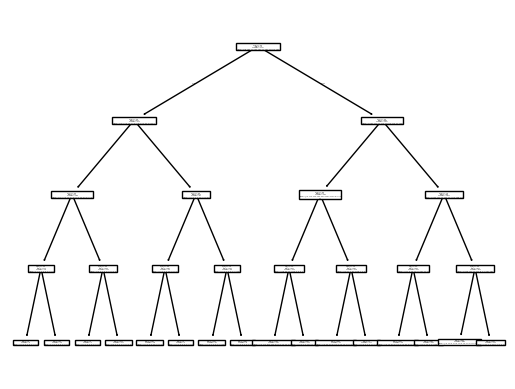

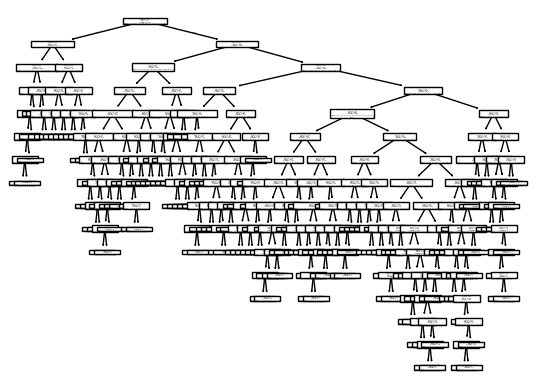

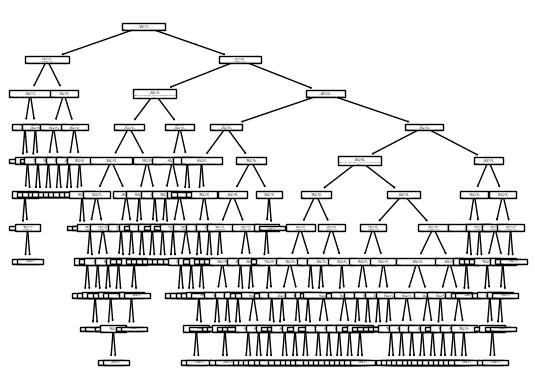

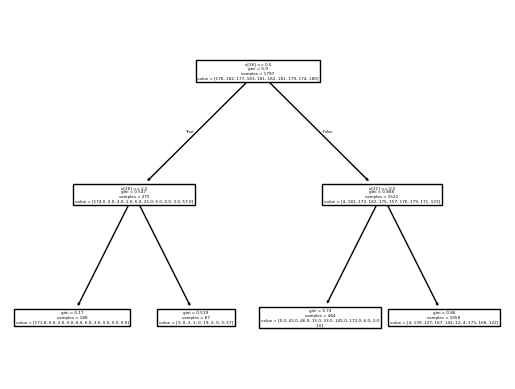

In [49]:
for tree in trees:
    plot_tree(tree)
    plt.show()

This (up to here) is not a forest, it trains on the same data with different algorithms.

In [50]:
results = {}
for i, tree in enumerate(trees):
    results[f"tree_{i}"] = tree.predict(attributes)

In [51]:
results = pd.DataFrame(results)

In [52]:
results['target'] = target

In [53]:
results

,tree_0,tree_1,tree_2,tree_3,tree_4,target
0,0,0,0,0,0,0
1,1,3,1,1,7,1
2,8,3,2,2,7,2
3,3,1,3,3,6,3
4,4,0,4,4,0,4
...,...,...,...,...,...,...
1792,9,3,9,9,7,9
1793,0,0,0,0,0,0
1794,8,3,8,8,7,8
1795,9,3,9,9,7,9


This is also not a forest -> it is a voting classifier.

To be a forest, all trees in it should have the same parameters. Each tree is trained on a different part of the data and with a different set of features. This makes the random forest to be really 'random'. The trees tend to overfit, that is why we rely that the majority vote conquers over the invidvidual vote, and thus, a forest to overfit to a smaller degree than the individual trees.

<b>Random Forest</b>

In [54]:
forest = RandomForestClassifier()

In [55]:
forest.fit(attributes, target)

RandomForestClassifier()

In [56]:
forest.estimator_

DecisionTreeClassifier()

In [57]:
forest.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1157821307),
 DecisionTreeClassifier(max_features='sqrt', random_state=1381292892),
 DecisionTreeClassifier(max_features='sqrt', random_state=1267702154),
 DecisionTreeClassifier(max_features='sqrt', random_state=1680357284),
 DecisionTreeClassifier(max_features='sqrt', random_state=1434544490),
 DecisionTreeClassifier(max_features='sqrt', random_state=2078114763),
 DecisionTreeClassifier(max_features='sqrt', random_state=240301401),
 DecisionTreeClassifier(max_features='sqrt', random_state=1334585885),
 DecisionTreeClassifier(max_features='sqrt', random_state=1780965548),
 DecisionTreeClassifier(max_features='sqrt', random_state=1361380834),
 DecisionTreeClassifier(max_features='sqrt', random_state=1839118852),
 DecisionTreeClassifier(max_features='sqrt', random_state=2142373986),
 DecisionTreeClassifier(max_features='sqrt', random_state=1633622679),
 DecisionTreeClassifier(max_features='sqrt', random_state=1501730002),
 Decisi

In [58]:
forest.estimators_[0].tree_.max_depth

16

In [59]:
max_depth_list = []
for estimator in forest.estimators_:
    max_depth_list.append(estimator.tree_.max_depth)
print(max_depth_list)

[16, 13, 14, 14, 13, 14, 15, 12, 15, 14, 14, 17, 13, 15, 15, 13, 13, 14, 12, 15, 14, 13, 12, 12, 13, 15, 14, 14, 16, 14, 15, 13, 14, 15, 13, 13, 15, 15, 13, 17, 13, 14, 12, 12, 14, 14, 16, 13, 14, 17, 14, 14, 13, 14, 14, 13, 14, 14, 13, 14, 13, 14, 14, 13, 13, 14, 14, 14, 15, 13, 15, 14, 14, 13, 16, 13, 12, 12, 14, 14, 11, 12, 14, 14, 14, 15, 11, 15, 13, 15, 14, 14, 15, 15, 15, 14, 13, 13, 13, 14]


<b>New forst</b>

In [60]:
forest = RandomForestClassifier(n_estimators = 7)

In [61]:
forest.fit(attributes, target)

RandomForestClassifier(n_estimators=7)

In [62]:
for estimator in forest.estimators_:
    print(estimator.tree_.max_depth)

15
15
13
16
14
13
15


In [63]:
forest.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [64]:
forest.feature_importances_

array([0.        , 0.00217403, 0.03089439, 0.01371205, 0.01048343,
       0.01777933, 0.01372148, 0.00029461, 0.        , 0.0095727 ,
       0.02041599, 0.00830334, 0.01622477, 0.01782668, 0.00532496,
       0.00013255, 0.        , 0.00551923, 0.02880226, 0.03563469,
       0.03342337, 0.06589449, 0.0054506 , 0.00042385, 0.        ,
       0.01464007, 0.05381486, 0.02765231, 0.03098706, 0.02194925,
       0.03629981, 0.00030647, 0.        , 0.02553645, 0.02555127,
       0.02256577, 0.01789575, 0.02119462, 0.02311929, 0.        ,
       0.00032573, 0.01578856, 0.02198554, 0.05323843, 0.02149659,
       0.01593001, 0.02070059, 0.00033703, 0.        , 0.00111375,
       0.02111659, 0.01338239, 0.01278446, 0.01504573, 0.01764826,
       0.00126287, 0.        , 0.00154166, 0.0148071 , 0.00586368,
       0.01787754, 0.03969518, 0.02167791, 0.0028586 ])

In [65]:
pd.DataFrame(list(zip(digits['feature_names'], np.round(forest.feature_importances_, 3)))).sort_values(1, ascending = False)

,0,1
21,pixel_2_5,0.066
26,pixel_3_2,0.054
43,pixel_5_3,0.053
61,pixel_7_5,0.040
19,pixel_2_3,0.036
...,...,...
16,pixel_2_0,0.000
15,pixel_1_7,0.000
8,pixel_1_0,0.000
7,pixel_0_7,0.000


In [66]:
forest.feature_importances_.sum()

1.0

How important is a feature? The number of times it has participated in a split (of the trees) -> higher information gain

<b>permutation_importance</b>

permutation -> shuffling

In [67]:
permutation_importance(forest, attributes, target)

{'importances_mean': array([ 0.        ,  0.        ,  0.00712298,  0.00189204,  0.00100167,
         0.0033389 ,  0.00055648,  0.        ,  0.        ,  0.00066778,
         0.00133556,  0.00044519,  0.00166945,  0.00133556,  0.00089037,
         0.        ,  0.        ,  0.00022259,  0.00267112,  0.0066778 ,
         0.0065665 ,  0.04040067, -0.0001113 ,  0.        ,  0.        ,
         0.00077908,  0.01524763,  0.00500835,  0.00856984,  0.00723428,
         0.00511964,  0.        ,  0.        ,  0.00456316,  0.00233723,
         0.00378408,  0.00233723,  0.00133556,  0.00456316,  0.        ,
         0.        ,  0.00055648,  0.00422927,  0.08291597,  0.00255982,
         0.00044519,  0.00478575,  0.        ,  0.        ,  0.        ,
         0.00089037,  0.00100167,  0.00077908,  0.00022259,  0.00367279,
         0.        ,  0.        ,  0.        ,  0.00255982,  0.00089037,
         0.00066778,  0.01168614,  0.0033389 ,  0.        ]),
 'importances_std': array([0.        , 0. 

In [68]:
permutation_importance(forest, attributes, target)["importances_mean"]

array([0.        , 0.        , 0.00701169, 0.00144686, 0.00122426,
       0.00255982, 0.00033389, 0.        , 0.        , 0.00044519,
       0.00211464, 0.00044519, 0.00155815, 0.00189204, 0.00089037,
       0.        , 0.        , 0.00044519, 0.00345019, 0.00812465,
       0.00745687, 0.04351697, 0.00022259, 0.        , 0.        ,
       0.00044519, 0.01380078, 0.00534224, 0.01046188, 0.00523094,
       0.00567613, 0.        , 0.        , 0.00445186, 0.00244853,
       0.00367279, 0.00200334, 0.00122426, 0.00378408, 0.        ,
       0.        , 0.00055648, 0.00445186, 0.08347245, 0.00133556,
       0.00122426, 0.00489705, 0.        , 0.        , 0.        ,
       0.00200334, 0.00122426, 0.00089037, 0.00022259, 0.00378408,
       0.        , 0.        , 0.        , 0.00367279, 0.00077908,
       0.00044519, 0.01168614, 0.0032276 , 0.        ])

In [69]:
pd.DataFrame(list(zip(digits['feature_names'], np.round(permutation_importance(forest, attributes, target)["importances_mean"], 3)))).sort_values(1, ascending = False)

,0,1
43,pixel_5_3,0.087
21,pixel_2_5,0.042
26,pixel_3_2,0.016
28,pixel_3_4,0.011
61,pixel_7_5,0.011
...,...,...
15,pixel_1_7,0.000
11,pixel_1_3,0.000
8,pixel_1_0,0.000
7,pixel_0_7,0.000


# Ensamble -> a combination of many (high number of) algorithms

Bagging -> a bag of algorithms each traind on the whole data, result: majority vote (except regression -> mean). We force these algorithms to be weak. baggingClassifier, BaggingRegressor...

Voting -> the same as bagging but with weights (each estimator has a weight)

Boosting -> Each algorithm is trained on the errors of the previous algorithm. In order to work the n-th algorithm, the n-1 algorithm should be executed. 1) Adaptive boosting (AdaBoost); 2) gradient boosting. 

Stacking -> the result of an algorithm is input for another algorithm  'input -> algorithm -> output -> algorithm -> output -> algorithm -> output' used in pipelines StackingClassifier, StackingRegressor

In [70]:
# extreme gradient boosting, overflow: overfits too much
xgb = XGBClassifier(objective = 'reg:squarederror')

In [71]:
xgb.fit(attributes, target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [72]:
xgb.predict(attributes)

array([0, 1, 2, ..., 8, 9, 8], dtype=int64)

In [73]:
predictions = xgb.predict(attributes)
list((t, p) for t, p in zip(target, predictions) if t != p) 

[]

Alternative: lightGBM -> very fast and works on GPU

<b> AdaBoost </b>

In [83]:
data = load_iris()
attributes, target = data['data'], data['target']

In [84]:
# Preprocessing, train / test split
# Single tree
tree = DecisionTreeClassifier(max_depth = 1)
tree.fit(attributes, target)
train_pred = accuracy_score(target, tree.predict(attributes))
# test_pred = accuracy_score(labels_test, tree.predict(features_test))
print(f"Decision tree accuracy: {train_pred:.3f}")

Decision tree accuracy: 0.667


In [85]:
tree = DecisionTreeClassifier(max_depth = 1)
ada = AdaBoostClassifier(estimator = tree, n_estimators = 100, algorithm='SAMME', learning_rate = 0.1)
ada.fit(attributes, target)
train_pred = accuracy_score(target, ada.predict(attributes))
# test_pred = accuracy_score(labels_test, ada.predict(features_test))
print(f"Decision tree accuracy: {train_pred:.3f}")

Decision tree accuracy: 0.967
